In [1]:
import pandas as pd
from isochrones.mist.bc import MISTBolometricCorrectionGrid

Holoviews not imported. Some visualizations will not be available.
PyMultiNest not imported.  MultiNest fits will not work.


In [2]:
bc_grid = MISTBolometricCorrectionGrid(['J', 'H', 'K', 'G', 'BP', 'RP', 'g', 'r', 'i'])

In [3]:
bc_grid.df.head()

g         r         i         J         H  \
Teff   logg [Fe/H] Av                                                       
2500.0 -4.0 -4.0   0.00 -6.534742 -3.332877 -1.617626  1.845781  2.927064   
                   0.05 -6.590469 -3.375570 -1.650338  1.831466  2.917990   
                   0.10 -6.646182 -3.418258 -1.683043  1.817153  2.908916   
                   0.15 -6.701881 -3.460939 -1.715740  1.802841  2.899842   
                   0.20 -6.757566 -3.503615 -1.748429  1.788530  2.890769   

                                K         G        BP        RP  
Teff   logg [Fe/H] Av                                            
2500.0 -4.0 -4.0   0.00  3.436304 -2.181987 -4.652549 -0.881256  
                   0.05  3.430463 -2.211638 -4.697705 -0.909058  
                   0.10  3.424623 -2.241241 -4.742843 -0.936830  
                   0.15  3.418782 -2.270798 -4.787964 -0.964572  
                   0.20  3.412942 -2.300307 -4.833067 -0.992286

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = bc_grid.df.reset_index()

/home/alex/miniconda3/envs/isochrones/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


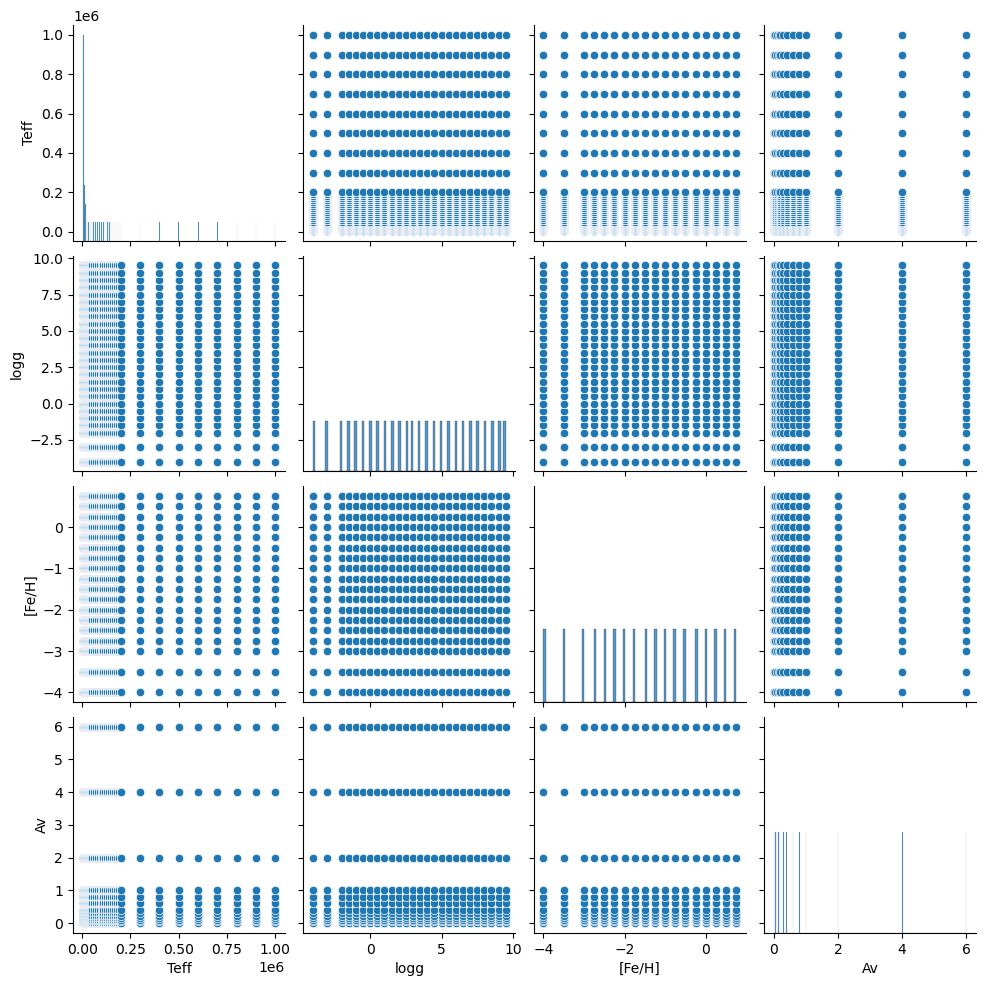

In [9]:
sns.pairplot(df, vars=["Teff", "logg", "[Fe/H]", "Av"]);

/home/alex/miniconda3/envs/isochrones/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


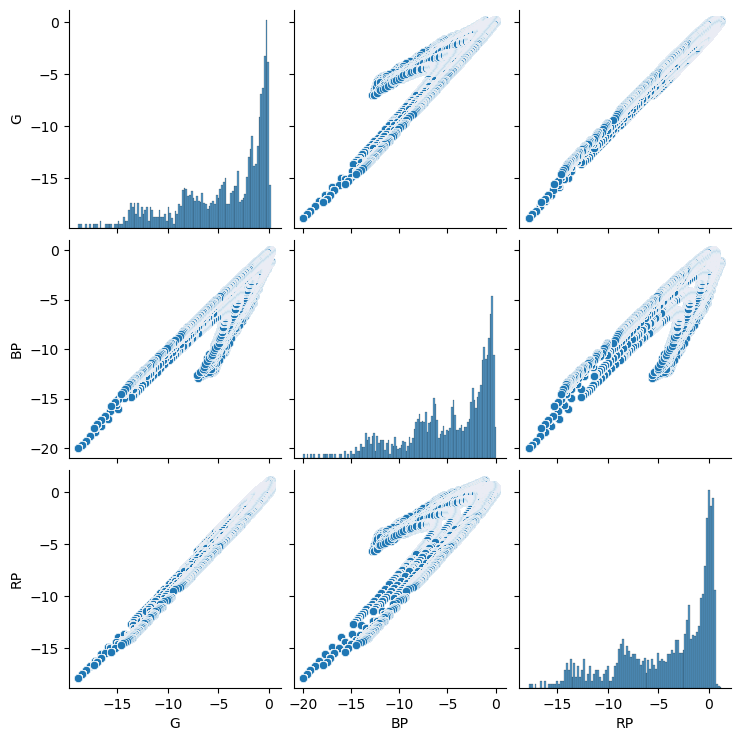

In [10]:
sns.pairplot(df, vars=["G", "BP", "RP"]);

In [11]:
mask = (df['Teff'] < 2e4) & (df['logg'] > 2) & (df['logg'] < 6) & (df['[Fe/H]'] > -1) & (df['Av'] < 2)

In [12]:
df.loc[mask]

,Teff,logg,[Fe/H],Av,g,r,i,J,H,K,G,BP,RP
2717,2500.0,2.5,-0.75,0.00,-5.637413,-4.568194,-1.400539,2.060398,2.639860,3.002975,-1.991365,-5.242927,-0.625698
2718,2500.0,2.5,-0.75,0.05,-5.696952,-4.611316,-1.432710,2.046009,2.630782,2.997152,-2.019406,-5.293596,-0.652348
2719,2500.0,2.5,-0.75,0.10,-5.756448,-4.654431,-1.464876,2.031621,2.621704,2.991329,-2.047406,-5.344184,-0.678977
2720,2500.0,2.5,-0.75,0.15,-5.815901,-4.697541,-1.497035,2.017235,2.612627,2.985506,-2.075366,-5.394691,-0.705585
2721,2500.0,2.5,-0.75,0.20,-5.875311,-4.740644,-1.529188,2.002850,2.603550,2.979684,-2.103285,-5.445118,-0.732172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241480,19000.0,5.5,0.75,0.30,-1.861904,-2.183569,-2.447663,-2.303521,-2.355423,-2.403468,-2.026746,-1.925213,-2.118498
241481,19000.0,5.5,0.75,0.40,-1.985719,-2.272163,-2.515660,-2.332726,-2.373775,-2.415273,-2.128151,-2.044439,-2.185879
241482,19000.0,5.5,0.75,0.60,-2.232891,-2.449264,-2.651562,-2.391117,-2.410474,-2.438880,-2.328813,-2.281386,-2.320206
241483,19000.0,5.5,0.75,0.80,-2.479451,-2.626248,-2.787342,-2.449485,-2.447165,-2.462485,-2.526617,-2.516345,-2.453953


/home/alex/miniconda3/envs/isochrones/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


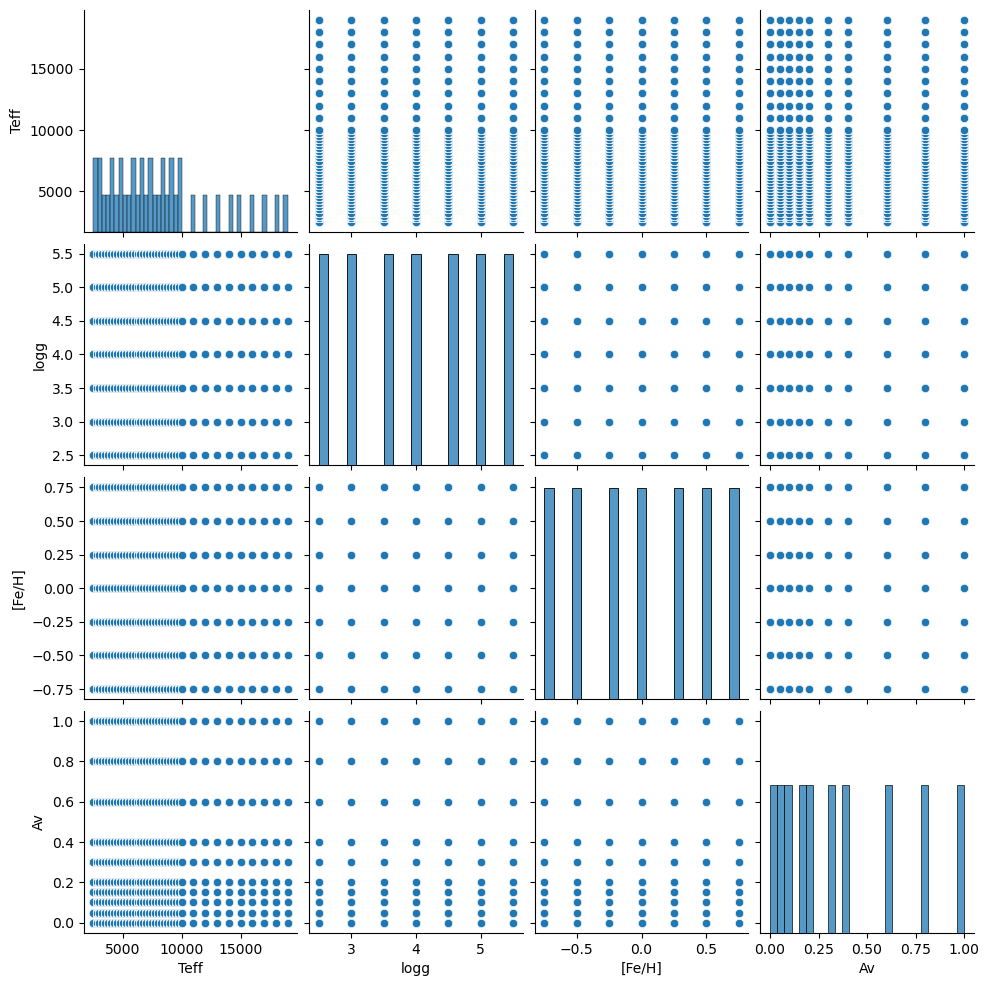

In [13]:
sns.pairplot(df.loc[mask], vars=["Teff", "logg", "[Fe/H]", "Av"]);

/home/alex/miniconda3/envs/isochrones/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


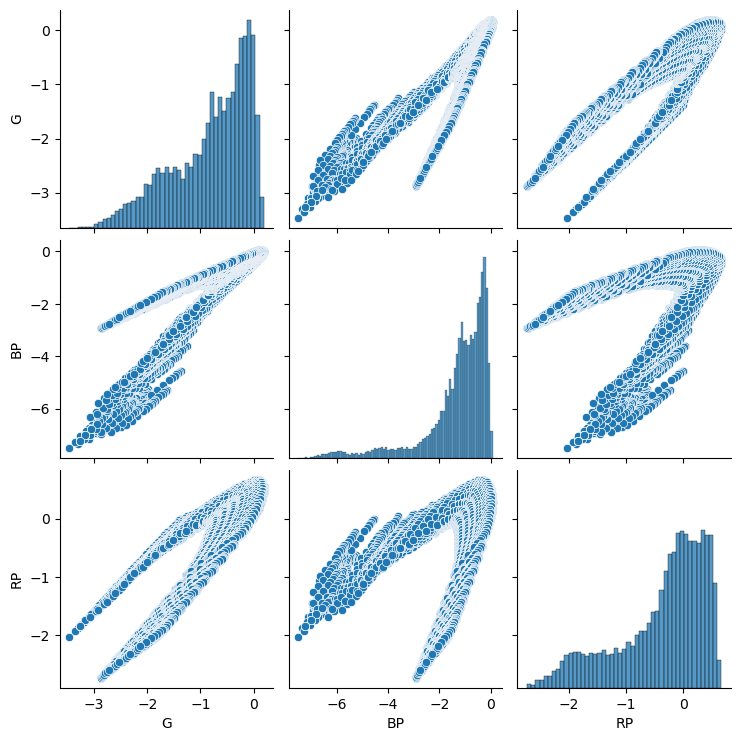

In [14]:
sns.pairplot(df.loc[mask], vars=["G", "BP", "RP"]);

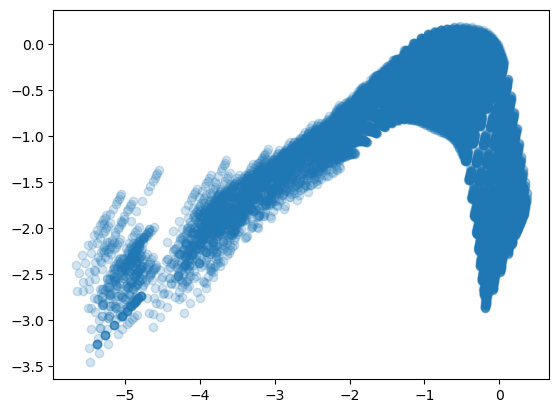

In [15]:
fig, ax = plt.subplots()

ax.scatter(df.loc[mask, "BP"] - df.loc[mask, "RP"], df.loc[mask, "G"], alpha=0.2)

In [18]:
from isochrones.interp import DFInterpolator

In [23]:
interp_df = df.loc[mask].set_index(['Teff', 'logg', '[Fe/H]', 'Av'])

In [24]:
interp = DFInterpolator(interp_df)

In [26]:
interp([5772., 4.4, 0.0, 0.0])

array([-0.34189704,  0.11405685,  0.21965047,  1.0833943 ,  1.4154305 ,
        1.45269524,  0.08206133, -0.23301443,  0.56320615])